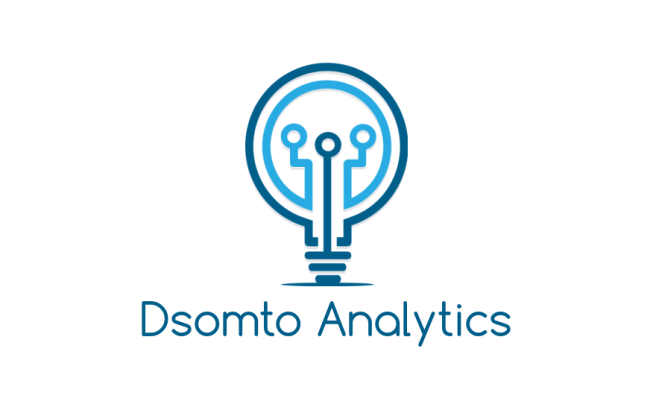

# _Exploratory Data Analysis on US Accidents._
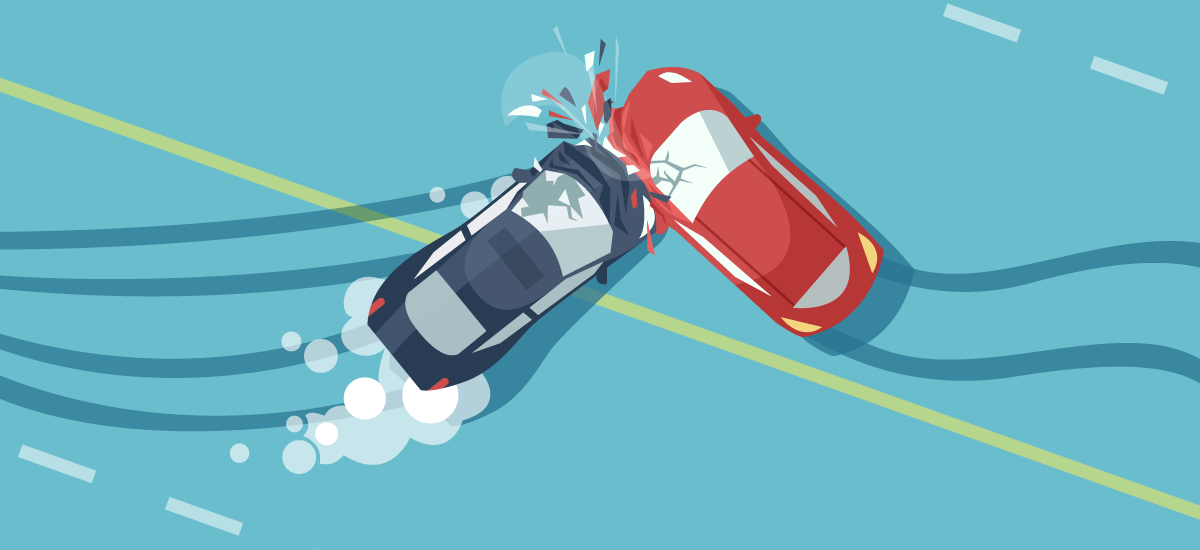

## Aim

This project is intended to investigate likely causes of accidents in the US by analyzing over 4 million records and proffering solutions to those causes.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
import folium
from folium.plugins import HeatMap

### 1. DATA PREPARATION
#### STEPS
* Create a DataFrame called Accidents. 
* Parse dates in Data Frame to ensure all dates are read as datetime and not numbers
* Make the Index column to be ID
* Take a quick look at the Data and proceed to cleaning it

In [2]:
df= pd.read_csv('data/US_Accidents_Dec21_updated.csv',parse_dates=True, index_col=0)

In [3]:
df.head(5)

,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
ID,,,,,,,,,,,,,,,,,,,,,
A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,NaN,...,False,False,False,False,False,False,Night,Night,Day,Day
A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,NaN,...,False,False,False,False,False,False,Day,Day,Day,Day


### 2. DATA CLEANING
#### STEPS
* Use python to get a general info about all the columns to see what I am working with
* Get a general statistical analysis of all the numeric columns.
* Get a comprehensive sum of all the null value in each column and convert it to percentages
* Use graphical method to see columns that have 50% or more null values and drop them

In [4]:
#This shows all the info and basic characteristics of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2845342 entries, A-1 to A-2845342
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Severity               int64  
 1   Start_Time             object 
 2   End_Time               object 
 3   Start_Lat              float64
 4   Start_Lng              float64
 5   End_Lat                float64
 6   End_Lng                float64
 7   Distance(mi)           float64
 8   Description            object 
 9   Number                 float64
 10  Street                 object 
 11  Side                   object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)        

In [5]:
#This is a statistical descriptiion of the numerical data 
description=df.describe()
description

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,1.101431e+06,2.776068e+06,2.375699e+06,2.772250e+06,2.786142e+06,2.774796e+06,2.687398e+06,2.295884e+06
mean,2.137572e+00,3.624520e+01,-9.711463e+01,3.624532e+01,-9.711439e+01,7.026779e-01,8.089408e+03,6.179356e+01,5.965823e+01,6.436545e+01,2.947234e+01,9.099391e+00,7.395044e+00,7.016940e-03
std,4.787216e-01,5.363797e+00,1.831782e+01,5.363873e+00,1.831763e+01,1.560361e+00,1.836009e+04,1.862263e+01,2.116097e+01,2.287457e+01,1.045286e+00,2.717546e+00,5.527454e+00,9.348831e-02
min,1.000000e+00,2.456603e+01,-1.245481e+02,2.456601e+01,-1.245457e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.344517e+01,-1.180331e+02,3.344628e+01,-1.180333e+02,5.200000e-02,1.270000e+03,5.000000e+01,4.600000e+01,4.800000e+01,2.931000e+01,1.000000e+01,3.500000e+00,0.000000e+00
50%,2.000000e+00,3.609861e+01,-9.241808e+01,3.609799e+01,-9.241772e+01,2.440000e-01,4.007000e+03,6.400000e+01,6.300000e+01,6.700000e+01,2.982000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.016024e+01,-8.037243e+01,4.016105e+01,-8.037338e+01,7.640000e-01,9.567000e+03,7.600000e+01,7.600000e+01,8.300000e+01,3.001000e+01,1.000000e+01,1.000000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.960000e+02,1.960000e+02,1.000000e+02,5.890000e+01,1.400000e+02,1.087000e+03,2.400000e+01


In [6]:
# created a variable for the null values in each column and converted it to percentages, 
Null_value= df.isnull().sum()
null_percentile=(Null_value.sort_values(ascending=False)/2.845342e+06)*100

In [7]:
# Making a line as the benchmark to see bars that pass the 50% cut off
null_percentile=null_percentile[null_percentile>0]
benchmark=(np.ones(20))*50

(array([ 0., 10., 20., 30., 40., 50., 60., 70.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

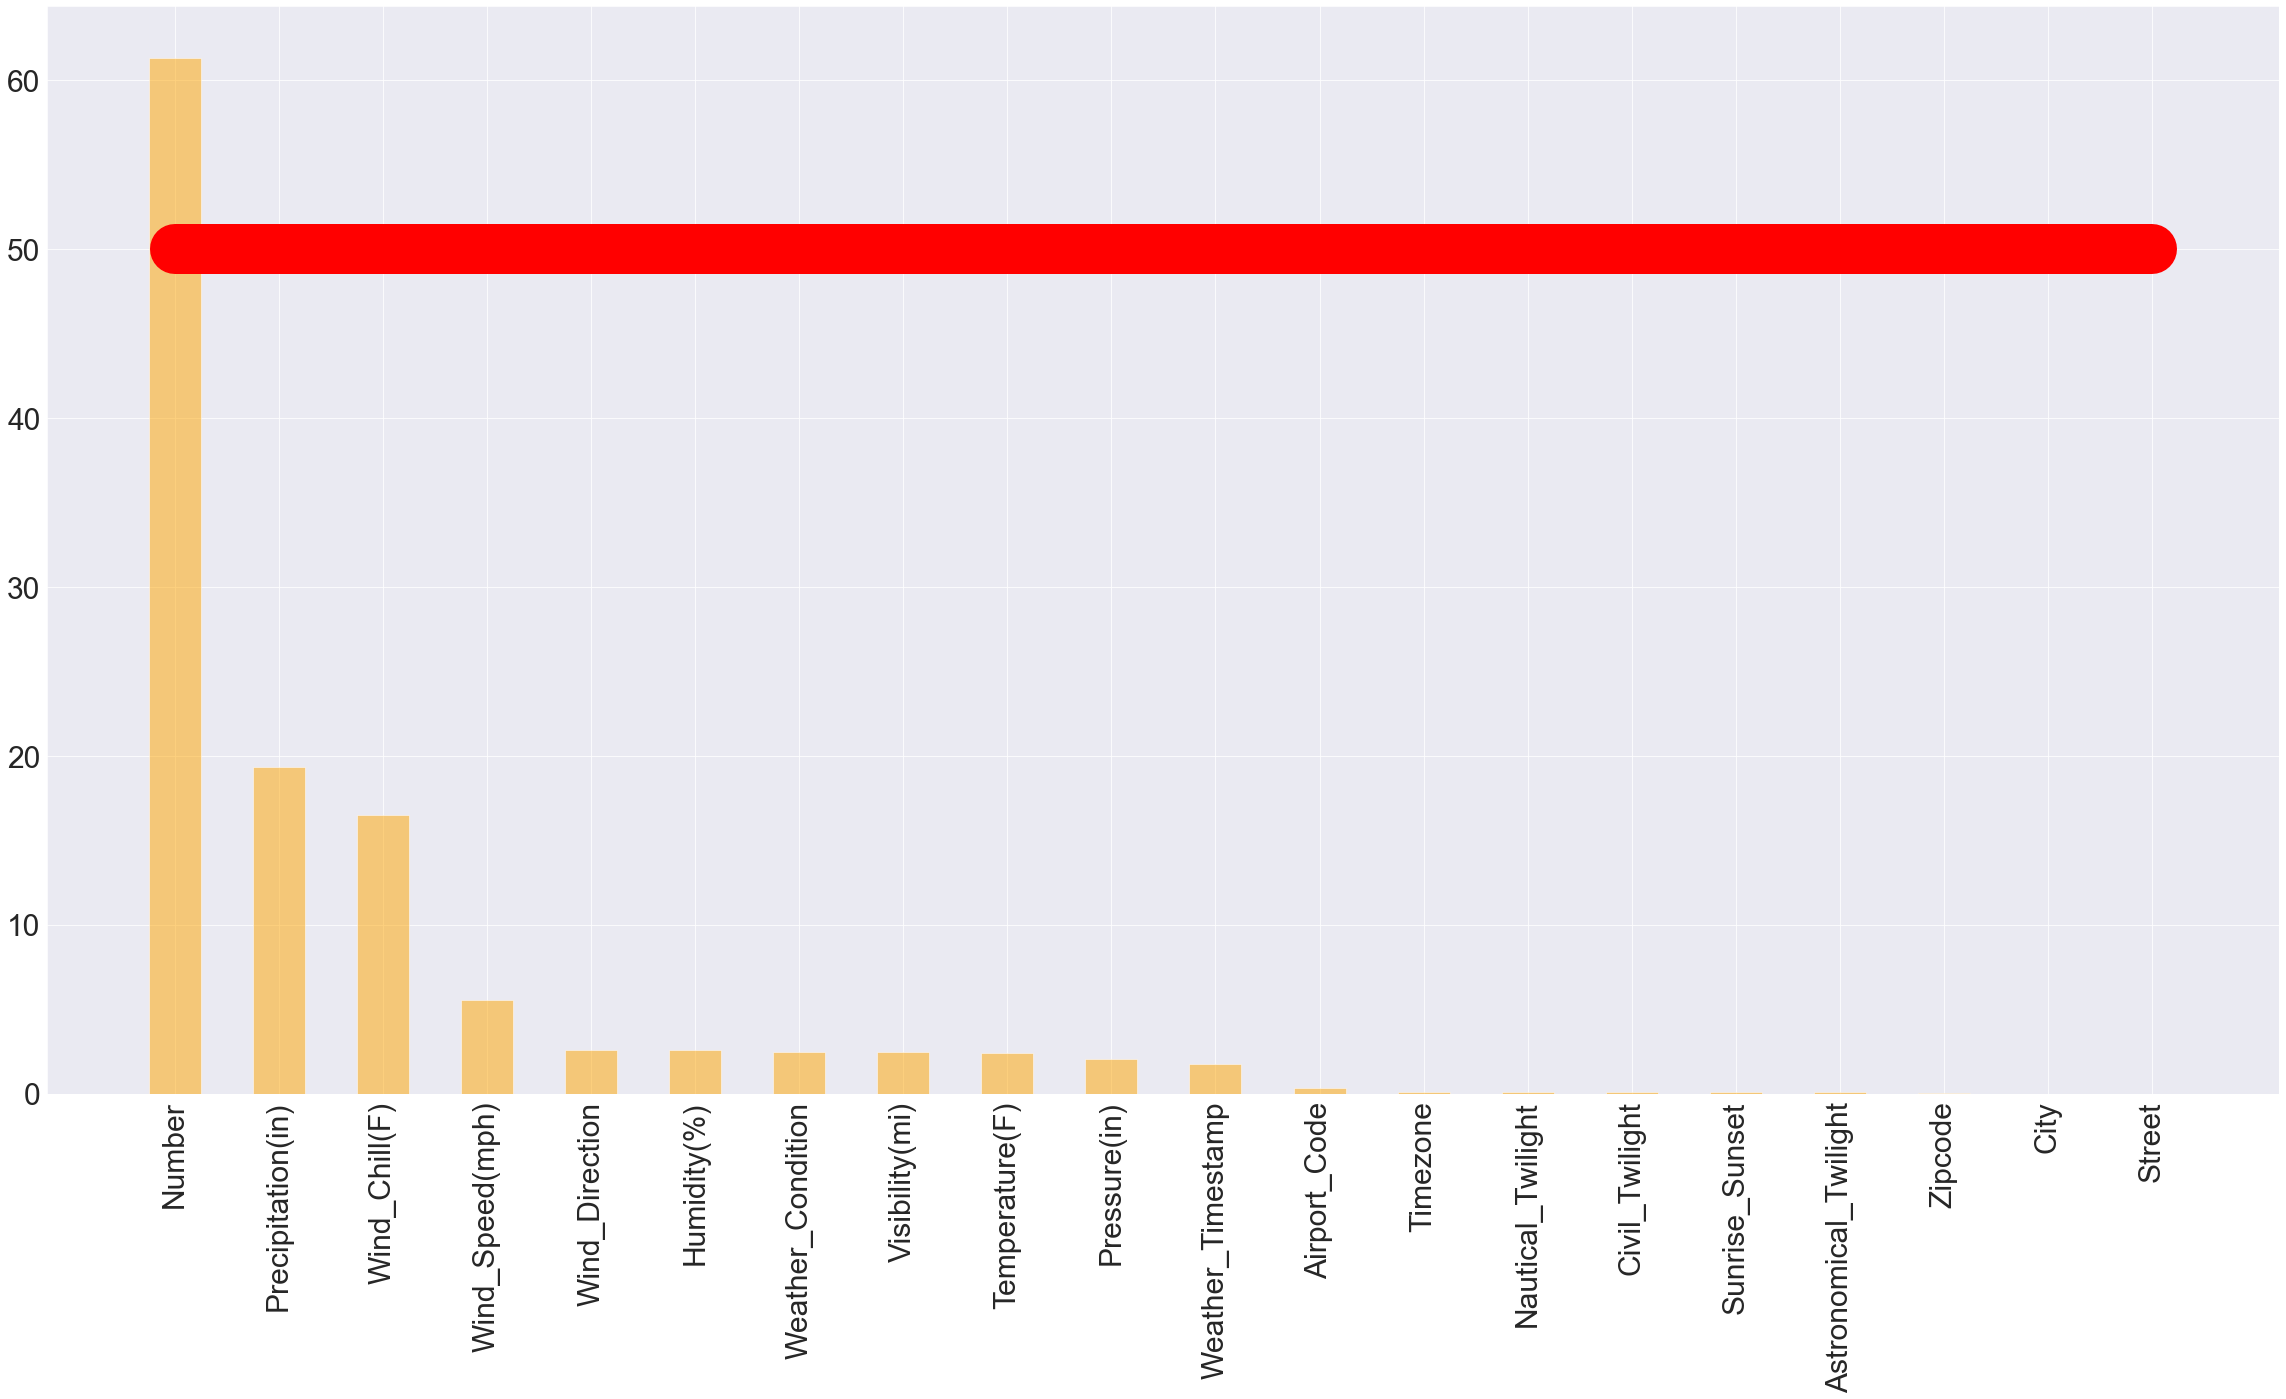

In [8]:

plat=plt.figure(figsize =(40,20))
#plat.style.use('dark_background')
plt.plot(null_percentile.index,benchmark,'r', label='Benchmark', linewidth=50)
plt.bar(null_percentile.index, null_percentile, width=0.5, alpha=0.5, color='orange', label="Null Value")
plt.xticks(fontsize=30, rotation=90)
plt.yticks(fontsize=30)

In [9]:
#Removing the column that has more than 50% of missing values.
df=df.drop(columns=['Number'])

# 3. Statistical Analysis on Columns
##### AIM :- I'm going to be doing analysis on  various columns that can help understand the factors causing accidents in the U.S

In [10]:
#list of all columns on the data frame

df.columns.sort_values()

Index(['Airport_Code', 'Amenity', 'Astronomical_Twilight', 'Bump', 'City',
       'Civil_Twilight', 'Country', 'County', 'Crossing', 'Description',
       'Distance(mi)', 'End_Lat', 'End_Lng', 'End_Time', 'Give_Way',
       'Humidity(%)', 'Junction', 'Nautical_Twilight', 'No_Exit',
       'Precipitation(in)', 'Pressure(in)', 'Railway', 'Roundabout',
       'Severity', 'Side', 'Start_Lat', 'Start_Lng', 'Start_Time', 'State',
       'Station', 'Stop', 'Street', 'Sunrise_Sunset', 'Temperature(F)',
       'Timezone', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Visibility(mi)', 'Weather_Condition', 'Weather_Timestamp',
       'Wind_Chill(F)', 'Wind_Direction', 'Wind_Speed(mph)', 'Zipcode'],
      dtype='object')

# CITY

In [11]:
city= df['City'].unique()


Text(0.5, 1.0, 'Graphical View of Top 50 Accidents by City')

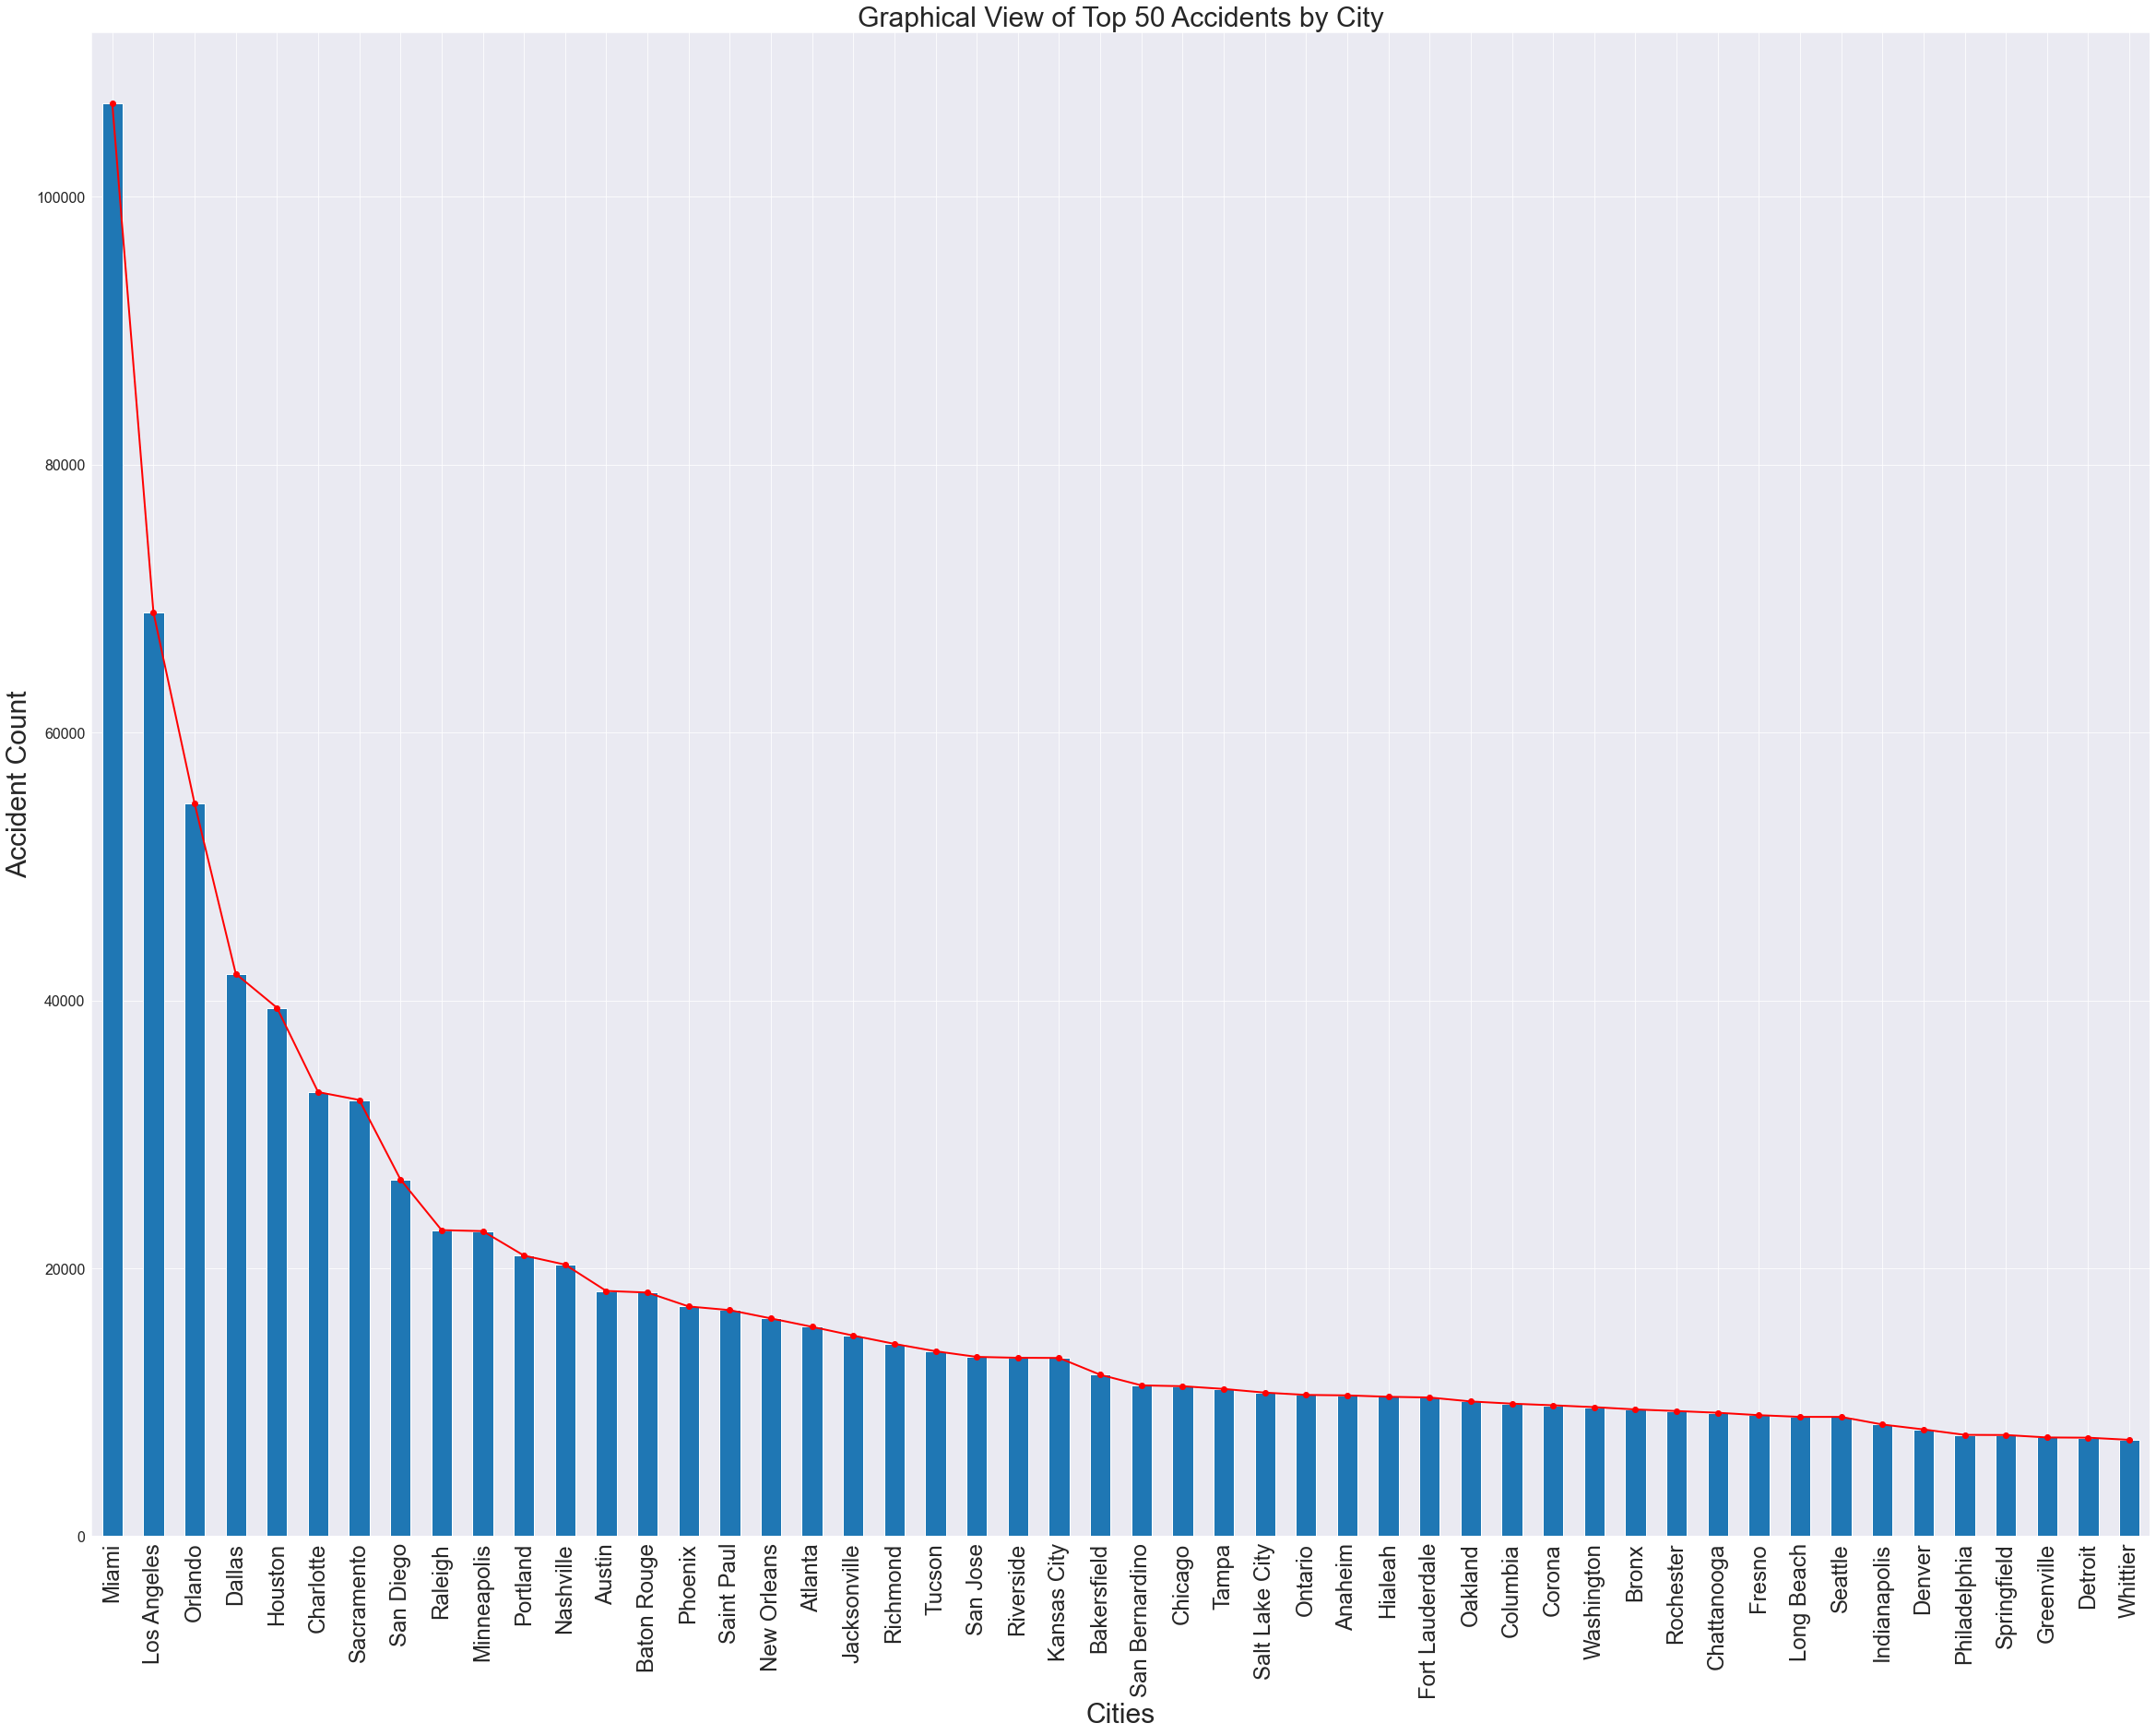

In [12]:
#plt.style.use('dark_background')
cities_by_accidents=df['City'].value_counts()
cities_by_accidents[:50].plot(kind='bar', figsize=(40,30))
cities_by_accidents[:50].plot(kind='line', figsize=(40,30), color='red', marker='o', linewidth=2)

plt.xticks(fontsize=24, rotation=90)
plt.yticks(fontsize=16)
plt.xlabel('Cities',fontsize=30)
plt.ylabel('Accident Count',fontsize=30)
plt.title("Graphical View of Top 50 Accidents by City",fontsize=30)


In [13]:
high_accident_cities= cities_by_accidents[cities_by_accidents>=1000]
low_accident_cities= cities_by_accidents[cities_by_accidents<1000]


In [14]:
high=(len(high_accident_cities)/len(cities_by_accidents))*100
print(str(high) + '%')

4.246211796935194%


In [15]:
low=(len(low_accident_cities)/len(cities_by_accidents))*100
print(str(low) + '%')

95.7537882030648%


## Observation
* The number of accidents by cities decreases, with a few cities accounting for a large number of accidents while the majority of cities have a low number of accidents as seen ine first graph.
* Approximately 40% of cities in the US  recorded accidents of 10 or fewer.
* Cities with 1000 or more yearly accidents make up only 4.9% of the total cities in the US, indicating that a small percentage of cities account for a large proportion of accidents.The distribution of accident rates by city population follows a similar pattern, with a few highly populated cities accounting for a large proportion of accidents, while smaller cities have lower accident rates on average as shown in the second graph. However, this relationship does not imply causation, and there may be other factors contributing to accident rates beyond population density.

### Question 1:-  Is there a relationship between the population of a city and its rate of car accidents?
>The analysis shows that there is a relationship between population and accident rates, with more densely populated cities generally having higher accident counts. For example, cities like Los Angeles, Dallas, and Chicago have some of the highest accident counts in the dataset, and they are also among the most populated cities in the United States. Conversely, smaller cities with lower populations such as Durham, North Carolina and Eugene, Oregon have lower accident counts.

>However, it's important to note that correlation does not necessarily imply causation. There may be other factors that contribute to accident rates in addition to population density, such as traffic flow, road conditions, and driver behavior. Further analysis would be needed to determine the extent to which these factors influence accident rates, and whether population density has a direct causal effect on accident rates.

### Question 2:-  Why is New York City, despite having the highest population in the United States, not among the top 10 cities with the highest rates of car accidents in the country?
>The general trend is that more densely populated areas tend to have higher accident rates. However, the case of New York City is an exception to this rule. Despite having a high population density, New York has a relatively low rate of car accidents compared to other cities with similar population densities.

>This can be attributed to several factors, including the extensive public transportation system in the city that reduces the need for residents to rely on cars as their primary mode of transportation. Additionally, New York is known for its pedestrian-friendly culture, which means that many people walk or use bikes to get around the city. This leads to fewer cars on the road and fewer opportunities for accidents to occur.

>Moreover, strict traffic laws and enforcement in the city also play a role in deterring drivers from engaging in risky behaviors such as speeding or distracted driving, which can significantly reduce the number of accidents.
In summary, while population density is a crucial factor in accident rates, other factors such as public transportation, pedestrian culture, and traffic enforcement can have a significant impact on accident rates as well.

### Question 3:-  What are the contributing factors to the higher proportion of car accidents in Miami compared to other similarly populated cities in the United States?
Although Miami has a lower population compared to other cities with high accident rates, it still experiences a relatively high number of car accidents. Some possible factors that could contribute to this include:
>* Tourist destination: Miami is a popular tourist destination with a high number of visitors each year. This could lead to increased traffic on the roads and unfamiliarity with local driving laws and customs.
>* Heavy traffic: Miami is known for its heavy traffic, especially during peak hours. This can increase the likelihood of accidents, especially when combined with aggressive driving behaviors.
>* Aggressive driving: Drivers in Miami are often known for their aggressive driving habits, such as speeding, tailgating, and reckless maneuvers. These behaviors can lead to a higher number of accidents on the road.
>* Weather conditions: Miami is located in an area that is susceptible to severe weather conditions such as heavy rain, hurricanes, and tropical storms. These weather events can create hazardous driving conditions and increase the likelihood of accidents

It's worth noting that while population density is often a contributing factor to accident rates, it's not the only factor to consider. Other factors such as traffic patterns, driving habits, and weather conditions can also play a significant role in accident rates

# TIME OF ACCIDENT.
##### Note :- Each graph will include questions and answer below to make the analysis easier to understand. Its important to note that i converted the y-axis to log scale

In [16]:
#Creating variables and converting the Start time column to a datetime
Start_time=df['Start_Time']
Start_time=pd.to_datetime(Start_time)
hour=Start_time.dt.hour

day=Start_time.dt.dayofweek
day.name=('Days')
weekend=Start_time[day>=5]
hour_weekend= weekend.dt.hour
hour_weekend.name=('Hours')
weekdays=Start_time[day<5]
hour_weekdays= weekdays.dt.hour
hour_weekdays.name=('Hours')
month= Start_time.dt.month
years = Start_time[Start_time.dt.year==2020]
year= Start_time.dt.year
year.name=('Years')
month=years.dt.month

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Days')

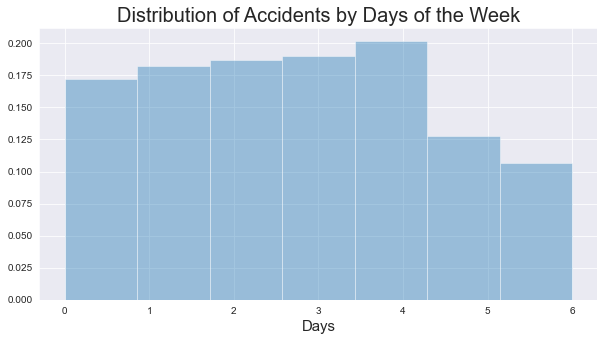

In [17]:
# graph for Days of the week
day=Start_time.dt.dayofweek
fig, ax = plt.subplots(figsize=(10,5))
sns.distplot(day, kde=False, bins=7, norm_hist=True)
plt.title('Distribution of Accidents by Days of the Week', fontsize=20)
plt.xlabel('Days',fontsize=15)

It is important to note that 0-6 on the x-axis represents Monday-Sunday

## Question 1
### Which day of the week is notorious for the highest number of accidents and what could be the reasons behind it?
> The day of the week with the most accidents is __FRIDAY__ and this is due to a combination of factors such as increased traffic volume, people rushing to complete work and errands before the weekend, and possibly higher instances of alcohol consumption as people begin their weekend celebrations. Additionally, Fridays often have a higher proportion of long-distance travelers on the roads, further contributing to the higher accident rate.

-------------------------------------------------------------------------------------------------------------------------------

## Question 2:- 
### Which hours of the week has the highest frequency of accidents and what could be the reasons behind it?
We have divided this question further down because there seem to be a different pattern between hours in weekdays and in weekends as seen in the graph above.


Text(0.5, 1.0, 'Distribution of Accidents by Hours of the Weekdays')

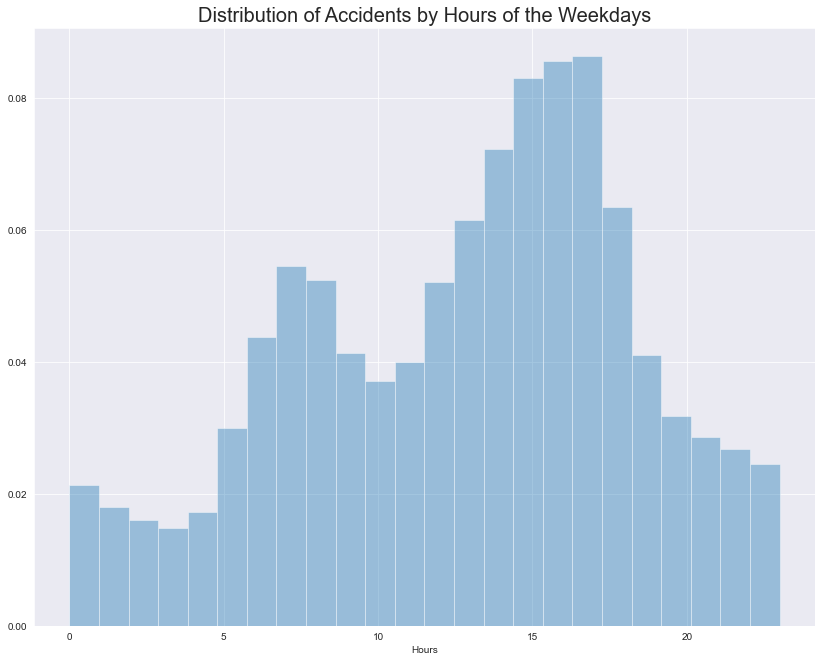

In [18]:
#Creating a bar chat to see hours by Weekdays
fig, ax = plt.subplots(figsize=(14,11))
sns.distplot(hour_weekdays,ax=ax, bins=24, norm_hist=True, kde=False)
plt.title('Distribution of Accidents by Hours of the Weekdays', fontsize=20)
#sns.histplot(hour,ax=ax, bins=2)

* __Hours of the Week During Weekdays__

>   The hours between 2 pm and 6 pm have the highest number of accidents, with 17:00(5pm) having the highest number of accidents during weekdays.

>* The morning rush hour, between 7 am and 9 am, also has a relatively high number of accidents, with 8 am having the highest number of accidents during that period.

>* The number of accidents tends to decrease as the day progresses, with the hours after 9 pm having relatively low numbers of accidents.

>* The hours between midnight and 4 am have the lowest number of accidents during weekdays.

>* These patterns suggest that factors such as rush hour traffic, fatigue, and reduced visibility during evening hours could be contributing to the higher accident rates during certain times of the day. To reduce accident rates during high-risk periods, efforts could be focused on improving road infrastructure, increasing awareness of safe driving practices, and implementing stricter enforcement of traffic laws during those times. Additionally, efforts to reduce driver fatigue, such as promoting healthy sleep habits, could also help reduce the number of accidents during high-risk periods.

Text(0.5, 1.0, 'Distribution of Accidents by Hours of the Weekends')

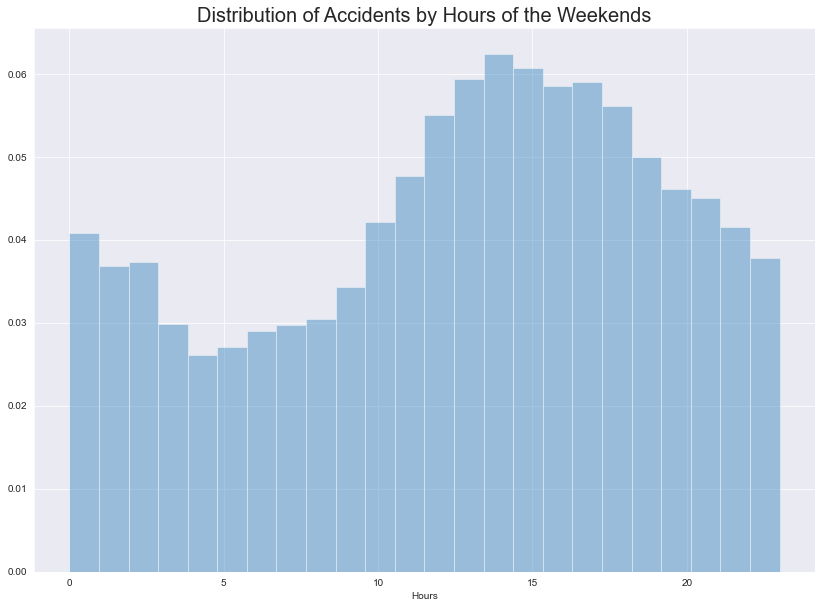

In [19]:
fig, ax = plt.subplots(figsize=(14,10))
sns.distplot(hour_weekend,ax=ax, bins=24, norm_hist=True, kde=False)
plt.title('Distribution of Accidents by Hours of the Weekends', fontsize=20)


* __Hours of the Week During Weekends__

> The weekends have a different pattern of accidents compared to weekdays, with the highest number of accidents occurring in the afternoon hours. This suggests that afternoon hours are more accident-prone on weekends, possibly due to higher traffic volume or more people traveling for leisure activities.

>* Unlike weekdays, there is no significant difference in the number of accidents during morning hours on weekends. In fact, the hours with the lowest number of accidents on weekends are from 6 am to 10 am.

>* Late night and early morning hours (from midnight to 6 am) also have a relatively high number of accidents on weekends, but the number decreases as the night progresses. This could be attributed to factors such as alcohol consumption and fatigue.

>* The data suggests that the number of accidents on weekends is generally lower than on weekdays, which could be due to fewer people commuting to work or school. However, the difference between the number of accidents on weekdays and weekends is not as significant as the difference between accident rates during different hours of the day.

>* Overall, these observations suggest that drivers and commuters should exercise caution during peak afternoon hours on weekends, as well as during late night and early morning hours. Additionally, law enforcement agencies and 

Text(0.5, 1.0, 'Distribution of Accidents by Year')

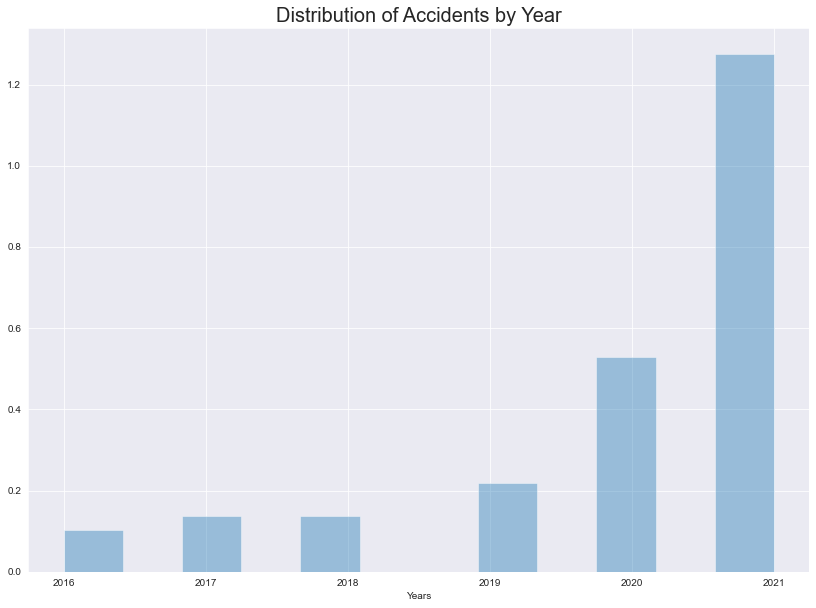

In [20]:
fig, ax = plt.subplots(figsize=(14,10))
sns.distplot(year,ax=ax,bins=12, norm_hist=True, kde=False)
plt.title('Distribution of Accidents by Year', fontsize=20)

## Question 3:- 
### Has there been a sharp increase in the number of accidents from year to year?
> Based on the data from 2018 and above, there seems to be a consistent exponential trend of an increasing number of accidents over the years. In 2018, there were 163,176 reported accidents, and in 2019, the number increased to 258,615. In 2020, the number further increased to 625,864, and in 2021, it reached its highest at 1,511,745.
There could be various factors that contributed to the increase in the number of accidents from 2018 onwards. Some possible reasons could include:

>* Increased population: As the population grows, there are more drivers on the road, leading to an increase in the number of accidents.

>* Distracted driving: With the increased use of smartphones and other electronic devices, more drivers are engaging in distracted driving, which can increase the likelihood of accidents.

>* Lenient traffic laws: If traffic laws are not being enforced as strictly as before, drivers may be more likely to engage in reckless behavior that can lead to accidents.

>* Poor road conditions: If roads are not properly maintained, they can become more hazardous, leading to an increase in accidents.

>* Other external factors: There could be other external factors such as changes in weather patterns or economic conditions that have contributed to the increase in accidents.

> However, it is clear that there is a need for increased awareness and measures to improve road safety in the area. This could include improved infrastructure such as better road signage, traffic signals, and road maintenance, as well as initiatives to promote safe driving behavior among motorists

## Observation
* The graph shows a noticeable spike in accident frequency during rush hour and peak commuting times, indicating a clear correlation between heavy traffic flow and accident rates.
* The accident distribution pattern on weekdays differs significantly from that on weekends, which can be attributed to varying levels of mobility and travel behavior during the workweek versus leisure time.
* The data reveals a rapid growth trend in accident rates from year to year, pointing to a systemic issue that requires urgent attention and proactive measures to mitigate.
* The distribution of accidents appears relatively equal throughout the year, but there is a slight right skew indicating a slightly higher number of accidents occurring in the latter months of the year.

# Geographical Location

<AxesSubplot:xlabel='Start_Lng', ylabel='Start_Lat'>

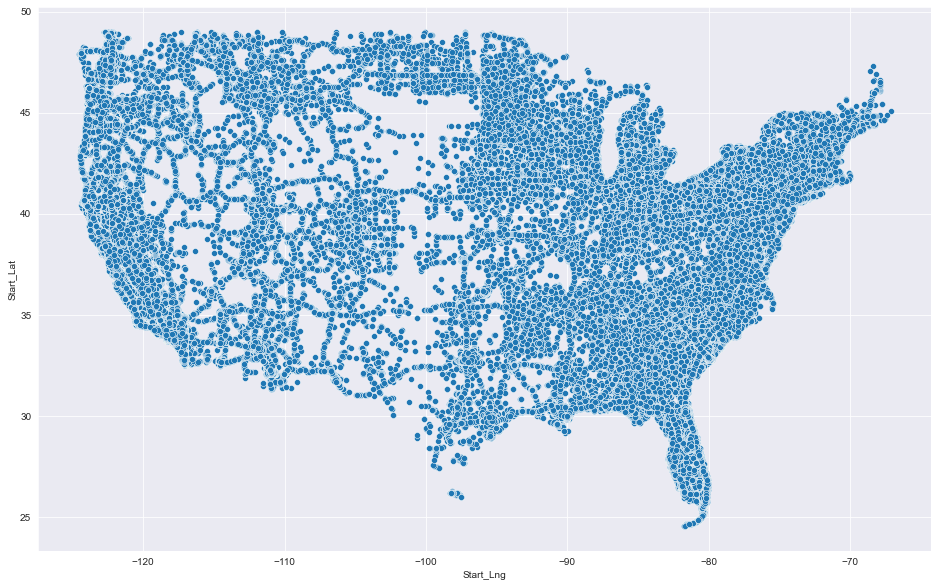

In [21]:
#plotting a scatterplot on the longitude and latitude of each data recorded
fig, ax = plt.subplots(figsize=(16,10))
sns.scatterplot(x=df['Start_Lng'],y=df['Start_Lat'],ax=ax)

## Question
### Why are there more accidents on the coast?
>There are several possible reasons why accidents may occur more frequently on the coast of the U.S than other areas which are 

>* High population density: Many coastal areas of the U.S. are densely populated, which can lead to higher traffic volumes and a greater likelihood of accidents.

>* Tourist traffic: Coastal areas are often popular tourist destinations, particularly during the summer months, which can lead to an influx of visitors and higher traffic volumes.

>* Severe weather conditions: Coastal areas are often prone to severe weather conditions such as hurricanes, heavy rain, and flooding. These conditions can make driving more difficult and increase the risk of accidents.

>* Narrow and winding roads: Many coastal roads are narrow and winding, which can make them more difficult to navigate and increase the risk of accidents.

>* Higher speed limits: Some coastal areas may have higher speed limits on major highways and interstates, which can lead to more serious accidents when they occur.

>* Commercial shipping and transportation: Many coastal areas are home to major port

>Furthermore, coastal areas may have different road infrastructure and traffic laws compared to other areas of the country. For example, some coastal states may have more lenient traffic laws or fewer traffic enforcement officers, which could contribute to a higher accident rate. It's also possible that cultural or societal factors unique to coastal areas could play a role, such as a greater emphasis on speed or a higher prevalence of distracted driving.

>Overall, there are likely multiple factors contributing to the higher accident rate in coastal areas, and further research and analysis would be needed to fully understand the underlying causes.

## Observation

* There appear to be more accidents on the right hand side of the coasts than on the left hand side but further analysis and data will be needed to establish any ground on this

# TEMPERATURE

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Temperature(F)'>

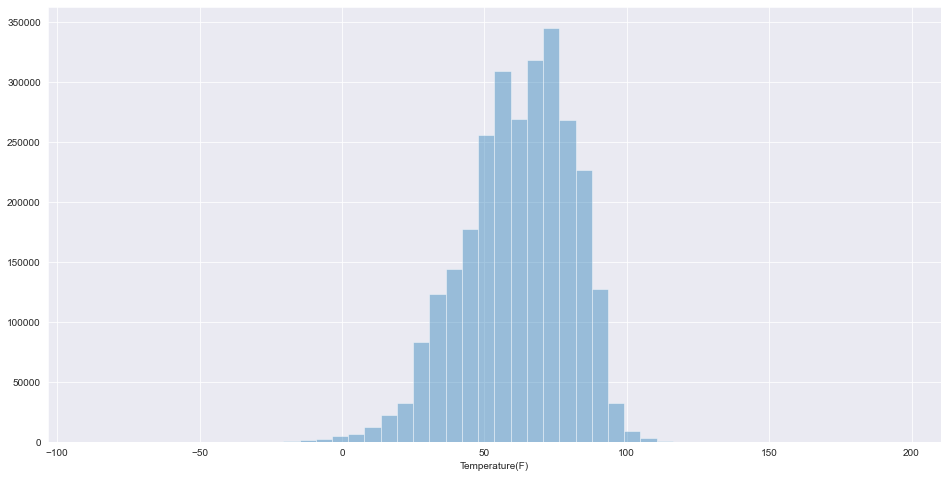

In [22]:
#Creating a Bar vhat showing the tempearture frequency
fig, ax = plt.subplots(figsize=(16,8))
sns.distplot(df['Temperature(F)'],ax=ax, kde=False)


## Observation
Based on historical temperature records for the United States, these temperatures do fall within the normal range of temperatures for many parts of the country during certain times of the year. For example, during summer months, temperatures in many parts of the US often range from the mid-70s to the mid-80s Fahrenheit. Additionally, it's worth noting that accidents can occur at any temperature, regardless of whether it falls within a normal range or not.



# WEATHER CONDITIONS 

Text(0.5, 1.0, 'Chart of Weather Conditions During Accidents')

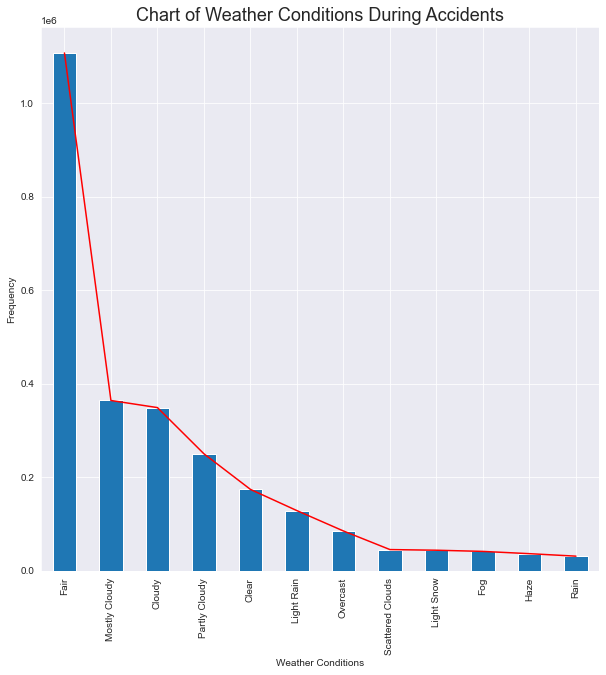

In [23]:
#plotting a pie chart for the first 12 weather conditions
weather_condition=df['Weather_Condition'].value_counts()
weather_condition[:12].plot(kind='line', figsize=(10,10), color='r')
weather_condition[:12].plot(kind='bar', figsize=(10,10))
plt.xticks(fontsize=10, rotation=90)
plt.yticks(fontsize=10)
plt.xlabel('Weather Conditions',fontsize=10)
plt.ylabel('Frequency',fontsize=10)
plt.title("Chart of Weather Conditions During Accidents",fontsize=18)


## Observation
* Most of the accident happened under fair weather conditions.
* Cloudy conditions were responsible for about 45% of accidents that occured.
* Rain although associated with accidents is not in the top 10 on the list

## Questions
### Does cloudiness affect accidents rate?

> Cloudiness is a common weather condition during accidents, with 'Mostly Cloudy', 'Cloudy', and 'Partly Cloudy' all appearing in the top 5 most frequent weather conditions during accidents.

> Cloudiness may impact driving conditions by reducing visibility and/or creating glare or other visual distractions for drivers. This can be especially problematic during certain times of day or in certain geographic locations, such as during sunrise or sunset, or in areas with many tall buildings or reflective surfaces.

> Cloudiness may also be associated with other weather conditions that can increase accident risk, such as precipitation, high winds, or extreme temperatures.

> To address these concerns, it may be helpful to take steps such as improving road lighting and signage, encouraging drivers to use headlights and other visibility-enhancing tools during cloudy conditions, and providing training or guidance to drivers on how to navigate glare and other visual distractions. Additionally, improving weather forecasting and alert systems may help drivers to better prepare for and avoid dangerous driving conditions associated with cloudiness.

> Overall, by taking a multi-faceted approach that includes both infrastructure improvements and driver education, we may be able to reduce the impact of cloudiness on accident rates and improve overall road safety.

---------------------------------------------------


# 4. Final Analysis and Conclusion

After analyzing the data provided, several conclusions can be drawn regarding the relationship between different factors and car accidents in the United States.

>Firstly, the analysis shows that there is a clear relationship between population and accident rates, with more densely populated cities generally having higher accident counts. This __may__ be due to the increased traffic density and congestion in urban areas, which increases the likelihood of accidents occurring.

>Secondly, the data shows that accidents tend to occur more frequently during rush hour traffic, with the highest number of accidents being recorded between 4-6pm on weekdays. This suggests that traffic congestion and the stress of rush hour driving may be contributing factors to the occurrence of accidents during these times. However, it's important to note that this could also be influenced by the higher volume of traffic during this time period.

>Furthermore, car accidents tend to occur more frequently during cloudy weather conditions. My hypothesis on this is that cloudy conditions causes reduced visibility while driving leading to car accidents

>Additionally, the data suggests that the number of car accidents in the US has been increasing rapidly in recent years, with 2021 having the highest number of recorded accidents. This trend is concerning and warrants further investigation to determine the underlying causes and potential solutions. It's possible that factors such as distracted driving, increased use of technology while driving, and the overall increase in traffic volume may be contributing to this trend.

Overall, the analysis of the data highlights the importance of considering all these conditions and their potential impact on driving safety. It emphasizes the need for continued efforts to improve road safety and reduce the number of car accidents in the United States through measures such as improved infrastructure, education, and enforcement of traffic laws.